In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 1s 0us/step


In [20]:
def get_review_text(sample):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?')
    for i in train_data[sample]])
    return decoded_review

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [15]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])



In [7]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 10s 281ms/step - loss: 0.5507 - accuracy: 0.7493 - val_loss: 0.4199 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3305 - accuracy: 0.8993 - val_loss: 0.3290 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2337 - accuracy: 0.9286 - val_loss: 0.2920 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1808 - accuracy: 0.9424 - val_loss: 0.2769 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1460 - accuracy: 0.9543 - val_loss: 0.2812 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1227 - accuracy: 0.9621 - val_loss: 0.3316 - val_accuracy: 0.8752
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0998 - accuracy: 0.9721 - val_loss: 0.3198 - val_accuracy: 0.8792
Epoch 8/20


In [8]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

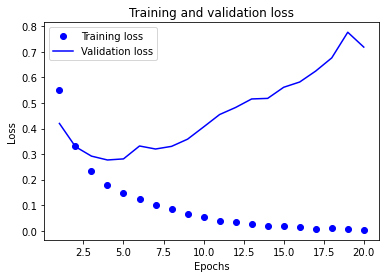

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


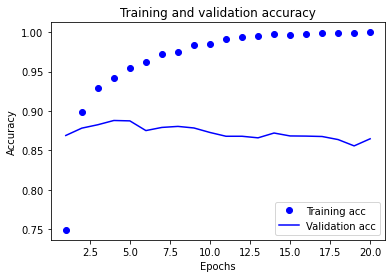

In [12]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 6s 18ms/step - loss: 0.4525 - accuracy: 0.8277
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2585 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1999 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.8853


In [14]:
results


[0.29203665256500244, 0.8852800130844116]